In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
df = pd.read_csv(r'D:\Shivangi\FinalYearProject\lastSem\independent_variable\variable_images\sampled_data\ALL_COMBINED_NO_LOC.csv')

In [5]:
df

,AET,Aridity(*10k),Cropland,PET,Precipitation,Geology,pH,Slope,Clay_content,Sand_content,Slit_content,Fluoride_class
0,949.0,6799.0,74.0,1772.0,1377.0,4.0,8.44,38,19.0,50.0,32.0,0
1,941.0,6575.0,72.0,1786.0,1088.0,4.0,8.40,357,10.0,70.0,9.0,0
2,935.0,6471.0,65.0,1784.0,1088.0,4.0,8.40,357,10.0,70.0,9.0,0
3,905.0,6163.0,72.0,1789.0,1088.0,4.0,8.12,510,10.0,70.0,9.0,0
4,1017.0,9284.0,48.0,1718.0,1702.0,4.0,8.12,209,10.0,70.0,9.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
12200,952.0,7279.0,100.0,1750.0,1411.0,4.0,7.10,1789,18.0,37.0,45.0,0
12201,945.0,7149.0,100.0,1744.0,1411.0,4.0,6.80,1789,18.0,37.0,45.0,0
12202,967.0,7545.0,99.0,1728.0,1397.0,4.0,6.95,1169,22.0,40.0,35.0,0
12203,964.0,7223.0,100.0,1719.0,1266.0,4.0,7.55,753,22.0,40.0,35.0,0


## Data Cleaning

In [6]:
df.columns

Index(['AET', 'Aridity(*10k)', 'Cropland', 'PET', 'Precipitation', 'Geology',
       'pH', 'Slope', 'Clay_content', 'Sand_content', 'Slit_content',
       'Fluoride_class'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12205 entries, 0 to 12204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AET             12163 non-null  float64
 1   Aridity(*10k)   11970 non-null  float64
 2   Cropland        12203 non-null  float64
 3   PET             12158 non-null  float64
 4   Precipitation   12109 non-null  float64
 5   Geology         12047 non-null  float64
 6   pH              12202 non-null  float64
 7   Slope           12205 non-null  int64  
 8   Clay_content    12168 non-null  float64
 9   Sand_content    12168 non-null  float64
 10  Slit_content    12168 non-null  float64
 11  Fluoride_class  12205 non-null  int64  
dtypes: float64(10), int64(2)
memory usage: 1.1 MB


In [8]:
df.describe()

,AET,Aridity(*10k),Cropland,PET,Precipitation,Geology,pH,Slope,Clay_content,Sand_content,Slit_content,Fluoride_class
count,12163.000000,11970.000000,12203.000000,12158.000000,12109.000000,12047.00000,12202.000000,12205.000000,12168.000000,12168.000000,12168.000000,12205.000000
mean,772.108526,6497.699582,61.511022,2015.945879,1269.550665,3.29800,7.780065,985.726014,26.559583,39.080786,24.945266,0.076362
std,200.105134,4594.698409,25.453348,226.783241,750.749515,1.43745,0.519431,845.303948,15.093051,19.563503,10.765534,0.265588
min,81.000000,418.000000,0.000000,1257.000000,111.000000,1.00000,3.720000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,680.000000,3724.250000,58.000000,1863.000000,836.000000,2.00000,7.480000,251.000000,20.000000,35.000000,21.000000,0.000000
50%,794.000000,5325.000000,70.000000,2018.000000,1104.000000,4.00000,7.800000,793.000000,23.000000,39.000000,27.000000,0.000000
75%,882.000000,7149.000000,78.000000,2189.000000,1378.000000,4.00000,8.100000,1516.000000,24.000000,41.000000,30.000000,0.000000
max,1313.000000,39152.000000,100.000000,2657.000000,5303.000000,6.00000,9.990000,4156.000000,59.000000,89.000000,45.000000,1.000000


In [9]:
df.isnull().sum()

AET                42
Aridity(*10k)     235
Cropland            2
PET                47
Precipitation      96
Geology           158
pH                  3
Slope               0
Clay_content       37
Sand_content       37
Slit_content       37
Fluoride_class      0
dtype: int64

In [10]:
data = df.dropna()

In [11]:
data.isnull().sum()

AET               0
Aridity(*10k)     0
Cropland          0
PET               0
Precipitation     0
Geology           0
pH                0
Slope             0
Clay_content      0
Sand_content      0
Slit_content      0
Fluoride_class    0
dtype: int64

In [12]:
data.describe()

,AET,Aridity(*10k),Cropland,PET,Precipitation,Geology,pH,Slope,Clay_content,Sand_content,Slit_content,Fluoride_class
count,11845.000000,11845.000000,11845.000000,11845.000000,11845.000000,11845.000000,11845.000000,11845.000000,11845.000000,11845.000000,11845.000000,11845.000000
mean,767.787168,6432.359392,62.529000,2019.709413,1247.791304,3.288392,7.785060,996.026256,26.784044,38.633685,25.018911,0.078008
std,198.532082,4528.060241,24.519632,225.746412,725.710590,1.443956,0.513671,845.845025,15.097062,19.278070,10.729117,0.268195
min,81.000000,418.000000,0.000000,1257.000000,111.000000,1.000000,3.720000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,678.000000,3716.000000,60.000000,1869.000000,829.000000,2.000000,7.480000,261.000000,20.000000,35.000000,22.000000,0.000000
50%,792.000000,5299.000000,71.000000,2022.000000,1096.000000,4.000000,7.800000,816.000000,23.000000,39.000000,27.000000,0.000000
75%,877.000000,7113.000000,78.000000,2192.000000,1368.000000,4.000000,8.100000,1525.000000,24.000000,40.000000,30.000000,0.000000
max,1313.000000,39152.000000,100.000000,2657.000000,5303.000000,6.000000,9.990000,4156.000000,59.000000,89.000000,45.000000,1.000000


## Encoding 

In [13]:
geo_unique = data['Geology'].nunique()
print("Number of unique values:", geo_unique)

Number of unique values: 6


In [14]:
data

,AET,Aridity(*10k),Cropland,PET,Precipitation,Geology,pH,Slope,Clay_content,Sand_content,Slit_content,Fluoride_class
0,949.0,6799.0,74.0,1772.0,1377.0,4.0,8.44,38,19.0,50.0,32.0,0
1,941.0,6575.0,72.0,1786.0,1088.0,4.0,8.40,357,10.0,70.0,9.0,0
2,935.0,6471.0,65.0,1784.0,1088.0,4.0,8.40,357,10.0,70.0,9.0,0
3,905.0,6163.0,72.0,1789.0,1088.0,4.0,8.12,510,10.0,70.0,9.0,0
4,1017.0,9284.0,48.0,1718.0,1702.0,4.0,8.12,209,10.0,70.0,9.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
12200,952.0,7279.0,100.0,1750.0,1411.0,4.0,7.10,1789,18.0,37.0,45.0,0
12201,945.0,7149.0,100.0,1744.0,1411.0,4.0,6.80,1789,18.0,37.0,45.0,0
12202,967.0,7545.0,99.0,1728.0,1397.0,4.0,6.95,1169,22.0,40.0,35.0,0
12203,964.0,7223.0,100.0,1719.0,1266.0,4.0,7.55,753,22.0,40.0,35.0,0


## Visualization


<AxesSubplot:>

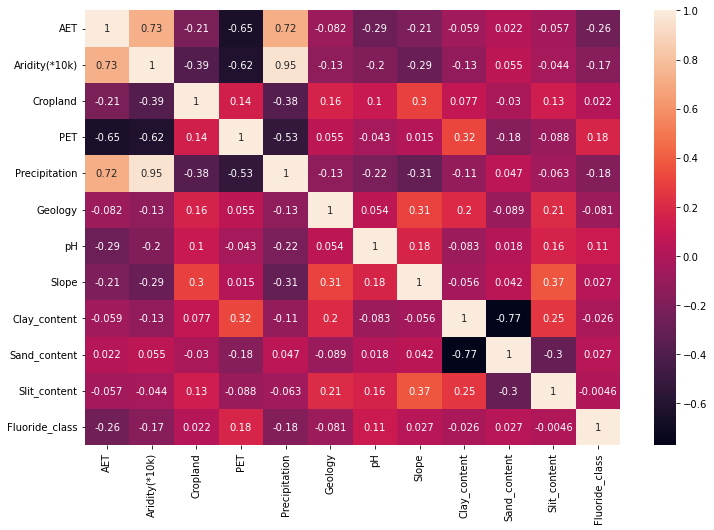

In [15]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True)


<AxesSubplot:xlabel='Fluoride_class', ylabel='count'>

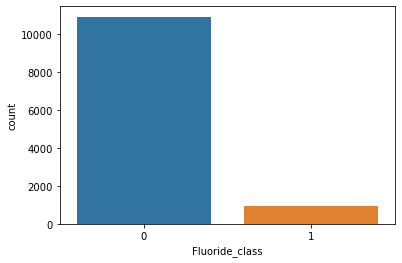

In [16]:
sns.countplot(x = "Fluoride_class", data = data)

In [17]:
data["Fluoride_class"].value_counts()

0    10921
1      924
Name: Fluoride_class, dtype: int64

In [18]:
x = data.drop("Fluoride_class", axis = 1)
y = data["Fluoride_class"]

In [19]:
x.shape, y.shape

((11845, 11), (11845,))

In [20]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[ 0.912802  ,  0.08097421,  0.46784897, ..., -0.51562169,
         0.58962305,  0.65069506],
       [ 0.87250455,  0.03150281,  0.38627823, ..., -1.11178934,
         1.62711507, -1.49309458],
       [ 0.84228146,  0.00853395,  0.10078066, ..., -1.11178934,
         1.62711507, -1.49309458],
       ...,
       [ 1.00347128,  0.24573162,  1.48748316, ..., -0.31689914,
         0.07087704,  0.9303198 ],
       [ 0.98835973,  0.17461649,  1.52826852, ..., -0.31689914,
         0.07087704,  0.9303198 ],
       [ 1.56763565,  0.71769756, -0.87806816, ..., -1.11178934,
         1.62711507, -1.49309458]])

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [22]:
x_train.shape, x_test.shape

((9476, 11), (2369, 11))

# Model Training

## Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

#object of LR
model_lr = LogisticRegression()

In [24]:
#Training Model
model_lr.fit(x_train, y_train)

LogisticRegression()

In [25]:
#Making predictions
pred_lr = model_lr.predict(x_test)

In [26]:
accuracy_score_lr = accuracy_score(y_test, pred_lr)
accuracy_score_lr * 100

91.6842549598987

## Decision Tree classifier

In [27]:
from sklearn.tree import DecisionTreeClassifier

# creating the model object
model_dt = DecisionTreeClassifier(max_depth = 4)

In [28]:
# Training the decision tree
model_dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [29]:
# Making predictio  using decision tree
pred_dt = model_dt.predict(x_test)

In [30]:
accuracy_score_dt = accuracy_score(y_test, pred_dt)
accuracy_score_dt * 100

91.76867876741241

In [31]:
# confusion matrix
cm2 = confusion_matrix(y_test, pred_dt)
cm2

array([[2174,    0],
       [ 195,    0]], dtype=int64)

<AxesSubplot:>

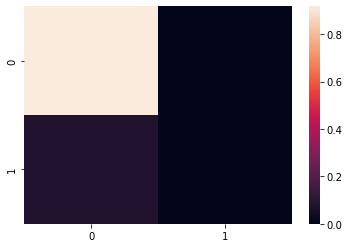

In [32]:
sns.heatmap(cm2/np.sum(cm2))

## Random Forest Classifier


In [33]:
from sklearn.ensemble import RandomForestClassifier

# creating object for RF
model_rf = RandomForestClassifier()

In [34]:
# Training model
model_rf.fit(x_train, y_train)

RandomForestClassifier()

In [35]:
# Making predcitions
pred_rf = model_rf.predict(x_test)

In [36]:
accuracy_score_rf = accuracy_score(y_test, pred_rf)
accuracy_score_rf * 100

92.02195018995357

In [37]:
# confusion matrix
cm3 = confusion_matrix(y_test, pred_rf)
cm3

array([[2153,   21],
       [ 168,   27]], dtype=int64)

## K Nearest Neighbours

In [38]:
from sklearn.neighbors import KNeighborsClassifier

# Creating model object
# model_knn = KNeighborsClassifier()

In [39]:
for i in range(40, 50):
    model_knn = KNeighborsClassifier(n_neighbors = i)
    model_knn.fit(x_train, y_train)
    pred_knn = model_knn.predict(x_test)
    accuracy_score_knn = accuracy_score(y_test, pred_knn)
    print(i, accuracy_score_knn * 100)

40 91.64204305614183
41 91.59983115238497
42 91.59983115238497
43 91.64204305614183
44 91.64204305614183
45 91.6842549598987
46 91.6842549598987
47 91.6842549598987
48 91.76867876741241
49 91.6842549598987


In [40]:
model_knn = KNeighborsClassifier(n_neighbors = 44)
model_knn.fit(x_train, y_train)
pred_knn = model_knn.predict(x_test)
accuracy_score_knn = accuracy_score(y_test, pred_knn)
accuracy_score_knn * 100

91.64204305614183

## Support Vector Machine SVM


In [41]:
from sklearn.svm import SVC

# Creating object
model_svm = SVC(kernel = "rbf")

In [42]:
# Training the model
model_svm.fit(x_train, y_train)

SVC()

In [43]:
# Making predictions
pred_svm = model_svm.predict(x_test)

In [44]:
accuracy_score_svm = accuracy_score(y_test, pred_svm)
accuracy_score_svm * 100

91.76867876741241

In [45]:
# confusion matrix
cm4 = confusion_matrix(y_test, pred_svm)
cm4

array([[2173,    1],
       [ 194,    1]], dtype=int64)

## AdaBoost Classifiers


In [46]:
from sklearn.ensemble import AdaBoostClassifier

# creating object
model_ada = AdaBoostClassifier(n_estimators = 200, learning_rate = 0.03)

In [47]:
# Training the model
model_ada.fit(x_train, y_train)

AdaBoostClassifier(learning_rate=0.03, n_estimators=200)

In [48]:
# Making predcition
pred_ada = model_ada.predict(x_test)

In [49]:
accuracy_score_ada = accuracy_score(y_test, pred_ada)
accuracy_score_ada * 100

91.76867876741241

# Model Comparision


In [51]:
models = pd.DataFrame({
    "Model" : ["Logistic Regression",
              "Decision Tree",
              "Random Forest",
              "KNN",
              "SVM",
              "AdaBoost"],
    
    "Accuracy Score" : [accuracy_score_lr * 100, 
                        accuracy_score_dt * 100, 
                        accuracy_score_rf * 100, 
                        accuracy_score_knn * 100,
                       accuracy_score_svm * 100,
                       accuracy_score_ada * 100]
})

,Model,Accuracy Score
2,Random Forest,92.021950
1,Decision Tree,91.768679
4,SVM,91.768679
5,AdaBoost,91.768679
0,Logistic Regression,91.684255
3,KNN,91.642043


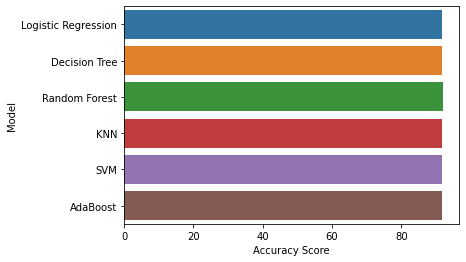

In [52]:
sns.barplot(x = "Accuracy Score", y = "Model", data = models)
models.sort_values(by = "Accuracy Score", ascending = False)